# Transfer Learning
Menggunakan transfer learning untuk menggunakan model yang telah di learn. Sehingga pola yang telah didapat akan digunakan pada kasus sendiri pada data sendiri. menggunakan transfer learning akan mempercepat proses pelatihan.
Biasanya dengan menggunakan transfer learning, akan memberikan hasil yang lebih baik.

In [ ]:
import os
import tensorflow as tf
import datetime
import zipfile


In [ ]:
print("tanggal :", datetime.datetime.today())

tanggal : 2023-10-04 15:47:12.912535


Berikut adalah contoh arisitektur transfer learning menggunakan **`EfficientNet`**.
![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-transfer-learning-feature-extraction.png)

Terlihat bahwasanya output yang telah dilatih berjumlah 1000 dari EfficientNet dan kasus yang ingin di klasifikasi berjumlah 10. Hal ini sangat memungkinkan menggunakan transfer learning.

## Data

In [ ]:
!nvidia-smi

Wed Oct  4 15:47:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-04 15:47:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.6MB/s    in 8.6s    

2023-10-04 15:47:22 (18.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



Disini akan menggunakan klasifikasi categorical. yang mana akan dilakukan klasifikasi sebanyak 10 class.

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

## Callback (sesuatu yang berjalan disaat dilakukan training)
Terdapat macam-macam callback, yaitu:
* [`**Experiment tracking with TensorBoard**`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard): TensorBoard memfasilitasi untuk melakukan perbandingan setiap model yang telah di experiment.
* [`**Model checkpointing**`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint): Akan memberikan fasilitas untuk menyimpan training setelah checkpoint, dengan demikian jikalau ingin memberhentikan proses training dan melanjutkannya kemudian waktu akan sangat memungkinkan.
* [`**Early stopping**`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping): Akan memberhentikan proses training jikalau suatu kondisi telah terpenuhi.

In [ ]:
def callback(dir_name, experiment_name):
  logdir= dir_name+ "/"+ experiment_name+ "/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback= tf.keras.callbacks.TensorBoard(
      log_dir= logdir
  )
  print("Menyimpan tensorboard di ", logdir)

  return tensorboard_callback

## Transfer Learning
Terdapat beberapa macam bentuk transfer learning.
* **Transfer learning**: menggunakan model tanpa melakukan perubahan.
* **Feature Extraction transfer learning**: menggunakan model dengan merubah output.
* **Fine-tuning transfer learning**: menggunakan mode dengan merubah output dan sebagian layer.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/04-different-kinds-of-transfer-learning.png)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Image_shape= (224, 224,)
Batch_size= 32

train_dir= "10_food_classes_10_percent/train/"
test_dir= "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_10_precent = train_datagen.flow_from_directory(train_dir,
                                                          target_size = Image_shape,
                                                          batch_size = Batch_size,
                                                          class_mode = 'categorical')

test_data_10_precent = test_datagen.flow_from_directory(test_dir,
                                                        target_size = Image_shape,
                                                        batch_size = Batch_size,
                                                        class_mode = 'categorical')



Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import numpy as np

np.unique(train_data_10_precent.classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
train_data_10_precent.image_shape

(224, 224, 3)

Menggunakan [efficientnet model](https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1)

In [ ]:
Image_shape + (3,)

(224, 224, 3)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers



In [ ]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [ ]:
# Membangung layer dengan menggunana feature extraction effiecnent net
model= tf.keras.Sequential([
                        hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                                      trainable=False,
                                      input_shape = Image_shape + (3,),
                                       name = "feature_extraction_layer"),
                        tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')
                        ])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
from keras.src.layers.serialization import activation
# atau dapat dengan membuat function
def create_model(model_url, num_classes = 10):
  """ menggunakan tensorflow hub model url untuk feature extraction

  Args:
    model_url : url dari model yang akan digunakan
    num_class : jumlah kelas yang akan diklasifikasi

  returns:
    keras sequental uncompiled model dengan feature extractor dari model url
    dan dense output untuk outputnya

  """

  feature_extrator= hub.KerasLayer(model_url,
                                    trainable = False,
                                    input_shape = Image_shape + (3,),
                                    name = "feature_extraction_layer")

  model= tf.keras.Sequential([
      feature_extrator,
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layers')
  ])

  return model

In [ ]:
efficientnet_model= create_model(efficientnet_url)

efficientnet_model.compile(loss= tf.keras.losses.categorical_crossentropy,
                           optimizer= tf.keras.optimizers.Adam(),
                           metrics= ['accuracy'])

In [ ]:
len(train_data_10_precent)

24

In [ ]:
history_efficientnet = efficientnet_model.fit(train_data_10_precent,
                                              epochs= 5,
                                              steps_per_epoch=len(train_data_10_precent),
                                              validation_data= test_data_10_precent,
                                              validation_steps= len(test_data_10_precent),
                                              callbacks= [callback(dir_name= 'tensorflow_hub',
                                                                    experiment_name= 'efficentNet')])

Menyimpan tensorboard di  tensorflow_hub/efficentNet/20231004-155256
Epoch 1/5
24/24 [==============================] - 20s 486ms/step - loss: 1.8929 - accuracy: 0.4147 - val_loss: 1.3356 - val_accuracy: 0.7144
Epoch 2/5
24/24 [==============================] - 10s 425ms/step - loss: 1.0912 - accuracy: 0.7627 - val_loss: 0.8928 - val_accuracy: 0.8088
Epoch 3/5
24/24 [==============================] - 10s 433ms/step - loss: 0.7785 - accuracy: 0.8320 - val_loss: 0.7099 - val_accuracy: 0.8428
Epoch 4/5
24/24 [==============================] - 10s 438ms/step - loss: 0.6228 - accuracy: 0.8600 - val_loss: 0.6187 - val_accuracy: 0.8528
Epoch 5/5
24/24 [==============================] - 13s 539ms/step - loss: 0.5275 - accuracy: 0.8853 - val_loss: 0.5659 - val_accuracy: 0.8592


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
history_efficientnet.history

{'loss': [1.892852544784546,
  1.091188907623291,
  0.778535008430481,
  0.6228297352790833,
  0.5275193452835083],
 'accuracy': [0.41466665267944336,
  0.762666642665863,
  0.8320000171661377,
  0.8600000143051147,
  0.8853333592414856],
 'val_loss': [1.3355698585510254,
  0.8927855491638184,
  0.7098806500434875,
  0.6186884045600891,
  0.5659335255622864],
 'val_accuracy': [0.7143999934196472,
  0.8087999820709229,
  0.8428000211715698,
  0.8528000116348267,
  0.8592000007629395]}

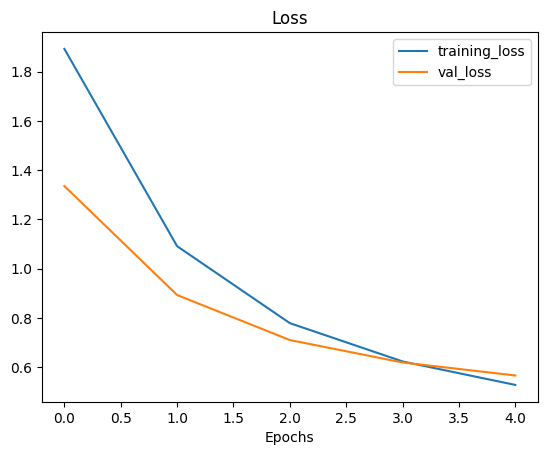

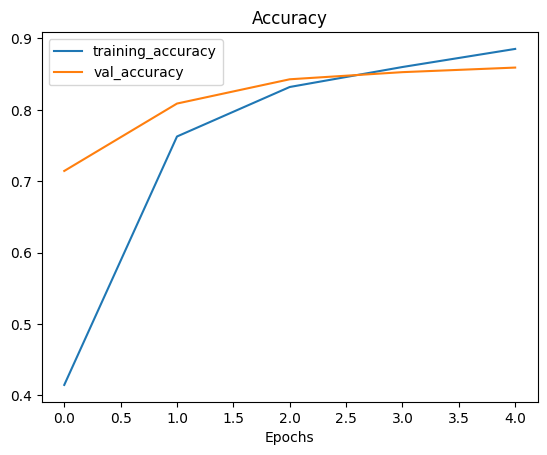

In [ ]:
plot_loss_curves(history_efficientnet)

Menggunakan 5 epoch sudah memberikan hasil 88 persen pada training dan 85 persen pada validation. Mari coba menggunakan 10 epoch

In [ ]:
efficientnet_model= create_model(efficientnet_url)

efficientnet_model.compile(loss= tf.keras.losses.categorical_crossentropy,
                           optimizer= tf.keras.optimizers.Adam(),
                           metrics= ['accuracy'])

In [ ]:
history_efficientnet = efficientnet_model.fit(train_data_10_precent,
                                              epochs= 10,
                                              steps_per_epoch=len(train_data_10_precent),
                                              validation_data= test_data_10_precent,
                                              validation_steps= len(test_data_10_precent),
                                              callbacks= [callback(dir_name= 'tensorflow_hub',
                                                                    experiment_name= 'efficentNet')])

Menyimpan tensorboard di  tensorflow_hub/efficentNet/20231004-160029
Epoch 1/10
24/24 [==============================] - 22s 511ms/step - loss: 1.8124 - accuracy: 0.4533 - val_loss: 1.2712 - val_accuracy: 0.7360
Epoch 2/10
24/24 [==============================] - 11s 455ms/step - loss: 1.0379 - accuracy: 0.7693 - val_loss: 0.8643 - val_accuracy: 0.8168
Epoch 3/10
24/24 [==============================] - 10s 427ms/step - loss: 0.7480 - accuracy: 0.8347 - val_loss: 0.6946 - val_accuracy: 0.8372
Epoch 4/10
24/24 [==============================] - 10s 433ms/step - loss: 0.5983 - accuracy: 0.8720 - val_loss: 0.6079 - val_accuracy: 0.8496
Epoch 5/10
24/24 [==============================] - 10s 432ms/step - loss: 0.5065 - accuracy: 0.8947 - val_loss: 0.5579 - val_accuracy: 0.8560
Epoch 6/10
24/24 [==============================] - 10s 437ms/step - loss: 0.4385 - accuracy: 0.9013 - val_loss: 0.5201 - val_accuracy: 0.8636
Epoch 7/10
24/24 [==============================] - 10s 413ms/step - loss

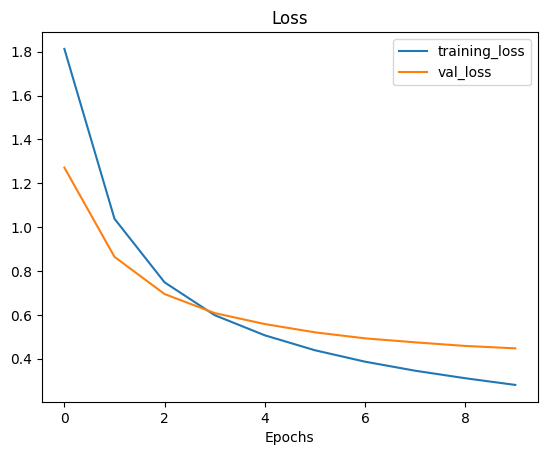

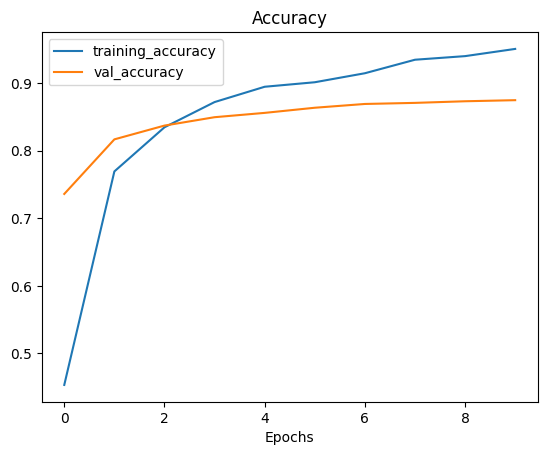

In [ ]:
plot_loss_curves(history_efficientnet)

hhmm.... bisa dikatakan ini terjadi overfitting. mari coba menggunakan fine tuning transfer learning.